## **Performance Metrics to evaluate text generating LLMs:**

- **ROUGE: Compares quality / similarity between reference and generated summary using N-grams**

In this notebook, we essentially focus on the ROUGE performance metric (more about this on the readme.md file).

### **Steps to run this Notebook:**

- **Step 1:** Download the libraries
- **Step 2:** Prompt the text generative LLM - using the prompt given below
- **Step 3:** Execute the cells
- **Step 4:** Download the resulting csv
- **Step 5:** Re-iterate for the other text generative LLMs

### **Loading the Data**

In [ ]:
# Install datasets and rouge-score
!pip install datasets
!pip install rouge-score

In [ ]:
# Importing Libraries
from datasets import load_dataset
from transformers import pipeline
from rouge_score import rouge_scorer
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
# Load the dataset
xsum_dataset = load_dataset("xsum", version="1.2.0")

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for xsum contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/xsum
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [ ]:
xsum_sample = xsum_dataset["train"].select(range(5))
display(xsum_sample.to_pandas())
print(xsum_sample.shape)

,document,summary,id
0,"The full cost of damage in Newton Stewart, one...",Clean-up operations are continuing across the ...,35232142
1,A fire alarm went off at the Holiday Inn in Ho...,Two tourist buses have been destroyed by fire ...,40143035
2,Ferrari appeared in a position to challenge un...,Lewis Hamilton stormed to pole position at the...,35951548
3,"John Edward Bates, formerly of Spalding, Linco...",A former Lincolnshire Police officer carried o...,36266422
4,Patients and staff were evacuated from Cerahpa...,An armed man who locked himself into a room at...,38826984


(5, 3)


In [ ]:
document_array = xsum_sample['document']
print(document_array)

['The full cost of damage in Newton Stewart, one of the areas worst affected, is still being assessed.\nRepair work is ongoing in Hawick and many roads in Peeblesshire remain badly affected by standing water.\nTrains on the west coast mainline face disruption due to damage at the Lamington Viaduct.\nMany businesses and householders were affected by flooding in Newton Stewart after the River Cree overflowed into the town.\nFirst Minister Nicola Sturgeon visited the area to inspect the damage.\nThe waters breached a retaining wall, flooding many commercial properties on Victoria Street - the main shopping thoroughfare.\nJeanette Tate, who owns the Cinnamon Cafe which was badly affected, said she could not fault the multi-agency response once the flood hit.\nHowever, she said more preventative work could have been carried out to ensure the retaining wall did not fail.\n"It is difficult but I do think there is so much publicity for Dumfries and the Nith - and I totally appreciate that - bu

In [ ]:
print(document_array[4])

Patients and staff were evacuated from Cerahpasa hospital on Wednesday after a man receiving treatment at the clinic threatened to shoot himself and others.
Officers were deployed to negotiate with the man, a young police officer.
Earlier reports that the armed man had taken several people hostage proved incorrect.
The chief consultant of Cerahpasa hospital, Zekayi Kutlubay, who was evacuated from the facility, said that there had been "no hostage crises", adding that the man was "alone in the room".
Dr Kutlubay said that the man had been receiving psychiatric treatment for the past two years.
He said that the hospital had previously submitted a report stating that the man should not be permitted to carry a gun.
"His firearm was taken away," Dr Kutlubay said, adding that the gun in the officer's possession on Wednesday was not his issued firearm.
The incident comes amid tension in Istanbul following several attacks in crowded areas, including the deadly assault on the Reina nightclub o

### **From here: re-execute the code for the different Text Generative Models:**

**Query the text generating llm with the following prompt:** (copy the document as mentionned: PASTE_DOCUMENTS_HERE)

```
Please generate a summary in one line (max 25 words) for each of the following documents: PASTE_DOCUMENTS_HERE, please just return the answer as the following: results={"generated_summary":["","","","",""]}
```

You might have to do it one by one, sometimes (at least in chatGPT) we get an error.



In [ ]:
# This is the output from CHATGPT (as example, but we need to do it for all the generative models we are testing)

results_chatgpt={"generated_summary":["Newton Stewart and Hawick face flood aftermath, Lamington Viaduct disrupts trains, First Minister inspects, and more preventative measures needed.",
                              "Fire alarm at Holiday Inn prompts evacuation; two tour buses, belonging to German and Chinese/Taiwanese groups, were deliberately set ablaze in Northern Ireland.",
                              "Mercedes dominates Bahrain GP qualifying with Hamilton securing pole, Vandoorne impresses on debut, controversial qualifying system retained.",
                              "John Edward Bates faces sexual abuse charges dating back to 1970s, denies allegations, trial ongoing.",
                              "Cerahpasa hospital evacuated after patient threatens violence, no hostages, Istanbul tensions rise amid recent attacks."]}

In [ ]:
results_gemini={"generated_summary":[
                "Floods hit Scotland's Dumfries & Galloway and the Borders, businesses and homes affected, flood defences questioned.",
                "Fire at Holiday Inn car park destroys 2 tour buses in Belfast, cause believed to be arson.",
                 "Mercedes top qualifying, Hamilton beats Rosberg. Ferrari falls short. Rookie Vandoorne outshines Button. Qualifying format debated.",
                "Police officer in Istanbul hospital threatened suicide, no hostages, receiving psychiatric treatment."]}

In [ ]:
results_mistral = {"generated_summary":[
                  "Flooding in Dumfries and Galloway and the Borders causes damage, displacement, and calls for improved flood defenses.",
                  "Two buses were deliberately set on fire at a Holiday Inn in Northern Ireland, destroying passengers' belongings and delaying tours.",
                  "Mercedes dominates qualifying for the Bahrain Grand Prix, with Ferrari in close pursuit and McLaren's Vandoorne outperforming teammate Button.",
                  "John Edward Bates faces 22 charges of sexual abuse against four males while he was a scout leader in South Lincolnshire and Cambridgeshire.",
                  "Armed police officer threatens to shoot himself and others at Cerahpasa hospital in Istanbul, leading to evacuation and negotiations."]}

In [ ]:
results_llama = {
                "generated_summary": [
                "Flooding in Newton Stewart, Hawick, and Peeblesshire, Scotland, has caused significant damage and disruption, with ongoing repair work and a flood alert in place.",
                "A fire at the Holiday Inn in Hope Street, Northern Ireland, forced guests to evacuate, with two buses parked outside engulfed in flames.",
                "Mercedes' Lewis Hamilton took pole position in Bahrain GP qualifying, followed by teammate Nico Rosberg and Ferrari's Sebastian Vettel.",
                "Former scout leader and police officer John Bates is on trial for sexual abuse charges.",
                "Man threatening to shoot himself and others at Cerahpasa hospital in Istanbul, Turkey, prompts evacuation of patients and staff."]
                }

In [ ]:
results = [results_chatgpt, results_gemini, results_mistral, results_llama]
names = ["Chat GPT", "Gemini", "Mistral", "Llama"]

In [ ]:
for res, name in zip(results, names):
    for doc in res.values():
        print(name)
        for summary_num, summary in enumerate(doc):
            print(f"Number of words in summerization {summary_num + 1} : {len(summary.split())}")
        print()

Chat GPT
Number of words in summerization 1 : 19
Number of words in summerization 2 : 23
Number of words in summerization 3 : 17
Number of words in summerization 4 : 15
Number of words in summerization 5 : 15

Gemini
Number of words in summerization 1 : 16
Number of words in summerization 2 : 17
Number of words in summerization 3 : 16
Number of words in summerization 4 : 12

Mistral
Number of words in summerization 1 : 17
Number of words in summerization 2 : 20
Number of words in summerization 3 : 19
Number of words in summerization 4 : 23
Number of words in summerization 5 : 19

Llama
Number of words in summerization 1 : 24
Number of words in summerization 2 : 23
Number of words in summerization 3 : 19
Number of words in summerization 4 : 15
Number of words in summerization 5 : 19



**Adding the Generated Summary in the Pandas Dataframe**

In [ ]:
opt_results_list = []

# Iterate over each result
for result, name in zip(results, names):
    # Create DataFrame for the current result
    opt_result = pd.DataFrame.from_dict(result).rename({"summary_text": "generated_summary"}, axis=1).join(pd.DataFrame.from_dict(xsum_sample))[["generated_summary", "summary", "document"]]
    opt_result.columns = ["Generated Summary", "Summary", "Document"]

    # Append the DataFrame to the list
    opt_results_list.append(opt_result)

# Display all DataFrames in the list
for opt_result in opt_results_list:
    display(opt_result.head())


,Generated Summary,Summary,Document
0,Newton Stewart and Hawick face flood aftermath...,Clean-up operations are continuing across the ...,"The full cost of damage in Newton Stewart, one..."
1,Fire alarm at Holiday Inn prompts evacuation; ...,Two tourist buses have been destroyed by fire ...,A fire alarm went off at the Holiday Inn in Ho...
2,Mercedes dominates Bahrain GP qualifying with ...,Lewis Hamilton stormed to pole position at the...,Ferrari appeared in a position to challenge un...
3,John Edward Bates faces sexual abuse charges d...,A former Lincolnshire Police officer carried o...,"John Edward Bates, formerly of Spalding, Linco..."
4,Cerahpasa hospital evacuated after patient thr...,An armed man who locked himself into a room at...,Patients and staff were evacuated from Cerahpa...


,Generated Summary,Summary,Document
0,Floods hit Scotland's Dumfries & Galloway and ...,Clean-up operations are continuing across the ...,"The full cost of damage in Newton Stewart, one..."
1,Fire at Holiday Inn car park destroys 2 tour b...,Two tourist buses have been destroyed by fire ...,A fire alarm went off at the Holiday Inn in Ho...
2,"Mercedes top qualifying, Hamilton beats Rosber...",Lewis Hamilton stormed to pole position at the...,Ferrari appeared in a position to challenge un...
3,Police officer in Istanbul hospital threatened...,A former Lincolnshire Police officer carried o...,"John Edward Bates, formerly of Spalding, Linco..."


,Generated Summary,Summary,Document
0,Flooding in Dumfries and Galloway and the Bord...,Clean-up operations are continuing across the ...,"The full cost of damage in Newton Stewart, one..."
1,Two buses were deliberately set on fire at a H...,Two tourist buses have been destroyed by fire ...,A fire alarm went off at the Holiday Inn in Ho...
2,Mercedes dominates qualifying for the Bahrain ...,Lewis Hamilton stormed to pole position at the...,Ferrari appeared in a position to challenge un...
3,John Edward Bates faces 22 charges of sexual a...,A former Lincolnshire Police officer carried o...,"John Edward Bates, formerly of Spalding, Linco..."
4,Armed police officer threatens to shoot himsel...,An armed man who locked himself into a room at...,Patients and staff were evacuated from Cerahpa...


,Generated Summary,Summary,Document
0,"Flooding in Newton Stewart, Hawick, and Peeble...",Clean-up operations are continuing across the ...,"The full cost of damage in Newton Stewart, one..."
1,"A fire at the Holiday Inn in Hope Street, Nort...",Two tourist buses have been destroyed by fire ...,A fire alarm went off at the Holiday Inn in Ho...
2,Mercedes' Lewis Hamilton took pole position in...,Lewis Hamilton stormed to pole position at the...,Ferrari appeared in a position to challenge un...
3,Former scout leader and police officer John Ba...,A former Lincolnshire Police officer carried o...,"John Edward Bates, formerly of Spalding, Linco..."
4,Man threatening to shoot himself and others at...,An armed man who locked himself into a room at...,Patients and staff were evacuated from Cerahpa...


In [ ]:
# Iterate over each DataFrame in the list
for opt_result in opt_results_list:
    # Print generated summary
    print("Generated Summary : ", opt_result.iloc[0]["Generated Summary"])
    print(30 * "-")

    # Print summary
    print("Summary : ", opt_result.iloc[0]["Summary"])
    print()


Generated Summary :  Newton Stewart and Hawick face flood aftermath, Lamington Viaduct disrupts trains, First Minister inspects, and more preventative measures needed.
------------------------------
Summary :  Clean-up operations are continuing across the Scottish Borders and Dumfries and Galloway after flooding caused by Storm Frank.

Generated Summary :  Floods hit Scotland's Dumfries & Galloway and the Borders, businesses and homes affected, flood defences questioned.
------------------------------
Summary :  Clean-up operations are continuing across the Scottish Borders and Dumfries and Galloway after flooding caused by Storm Frank.

Generated Summary :  Flooding in Dumfries and Galloway and the Borders causes damage, displacement, and calls for improved flood defenses.
------------------------------
Summary :  Clean-up operations are continuing across the Scottish Borders and Dumfries and Galloway after flooding caused by Storm Frank.

Generated Summary :  Flooding in Newton Stewa

#### **Calculating the ROUGE score:**

In [ ]:
def calculate_rouge(data):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    data["r1_fscore"] = data.apply(lambda row : scorer.score(row["Summary"],row["Generated Summary"])['rouge1'][2], axis=1)
    data["r2_fscore"] = data.apply(lambda row : scorer.score(row["Summary"],row["Generated Summary"])['rouge2'][2], axis=1)
    data["rl_fscore"] = data.apply(lambda row : scorer.score(row["Summary"],row["Generated Summary"])['rougeL'][2], axis=1)
    return data

In [ ]:
score_rets = []
for opt_result in opt_results_list:
    score_rets.append(calculate_rouge(opt_result))

In [ ]:
# Initialize lists to store ROUGE scores
r1_scores = []
r2_scores = []
rl_scores = []

# Iterate over each DataFrame in the score_ret list
for score_ret,name in zip(score_rets,names):
    print(name)
    print("ROUGE - 1 : ",score_ret["r1_fscore"].mean())
    # print("ROUGE - 2 : ",score_ret["r2_fscore"].mean())
    print("ROUGE - L : ",score_ret["rl_fscore"].mean()) # longest common subsequence between the model-generated summary and the reference summary
    print()


Chat GPT
ROUGE - 1 :  0.13631762332660918
ROUGE - L :  0.09317806711901706

Gemini
ROUGE - 1 :  0.26176470588235295
ROUGE - L :  0.1600840336134454

Mistral
ROUGE - 1 :  0.30557725189304136
ROUGE - L :  0.22201790307053465

Llama
ROUGE - 1 :  0.28829943552097775
ROUGE - L :  0.22937988505919962



#### **Exporting the data into a clean CSV for invidual model results**

In [ ]:
score_rets[0]

,Generated Summary,Summary,Document,r1_fscore,r2_fscore,rl_fscore
0,Newton Stewart and Hawick face flood aftermath...,Clean-up operations are continuing across the ...,"The full cost of damage in Newton Stewart, one...",0.157895,0.0,0.105263
1,Fire alarm at Holiday Inn prompts evacuation; ...,Two tourist buses have been destroyed by fire ...,A fire alarm went off at the Holiday Inn in Ho...,0.195122,0.0,0.146341
2,Mercedes dominates Bahrain GP qualifying with ...,Lewis Hamilton stormed to pole position at the...,Ferrari appeared in a position to challenge un...,0.228571,0.0,0.114286
3,John Edward Bates faces sexual abuse charges d...,A former Lincolnshire Police officer carried o...,"John Edward Bates, formerly of Spalding, Linco...",0.000000,0.0,0.000000
4,Cerahpasa hospital evacuated after patient thr...,An armed man who locked himself into a room at...,Patients and staff were evacuated from Cerahpa...,0.100000,0.0,0.100000


In [94]:
def save_scores(model_names, score_rets):
    # Create the "Output/1" folder if it doesn't exist
    output_folder = os.path.join("Outputs", "1")
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Save individual ROUGE scores for each model
    for model_name, score_ret in zip(model_names, score_rets):
        # Create DataFrame for individual model scores
        df = pd.DataFrame(score_ret)
        df["model_name"] = model_name

        # Save the DataFrame to a CSV file in the "Output/1" folder
        output_filename = f"{model_name.lower().replace(' ', '_')}.csv"
        output_path = os.path.join(output_folder, output_filename)
        df.to_csv(output_path, index=False)

    # Create DataFrame for combined mean scores
    combined_df = pd.DataFrame(columns=["model_name", "metric_1_unigram", "metric_2_longest"])

    for model_name, score_ret in zip(model_names, score_rets):
        mean_metric_1_unigram = round(pd.DataFrame(score_ret)['r1_fscore'].mean(), 2)
        mean_metric_2_longest = round(pd.DataFrame(score_ret)['rl_fscore'].mean(), 2)
        combined_df = pd.concat([combined_df, pd.DataFrame({"model_name": [model_name],
                                                            "metric_1_unigram": [mean_metric_1_unigram],
                                                            "metric_2_longest": [mean_metric_2_longest]})],
                                ignore_index=True)

    # Save the combined DataFrame to a CSV file in the "Output/1" folder
    combined_output_filename = "Combined.csv"
    combined_output_path = os.path.join(output_folder, combined_output_filename)
    combined_df.to_csv(combined_output_path, index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [95]:
save_scores(names, score_rets)

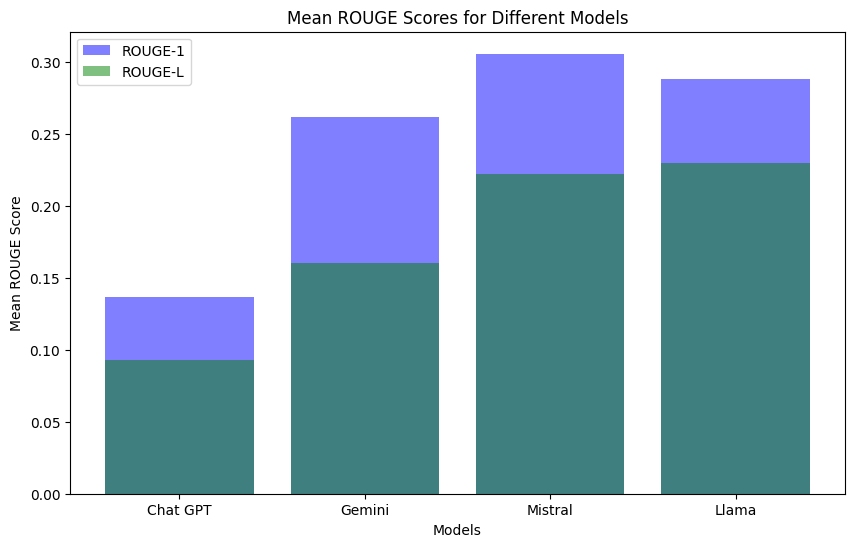

<Figure size 640x480 with 0 Axes>

In [91]:
# Initialize lists to store mean ROUGE scores
r1_means = []
r2_means = []
rl_means = []

# Iterate over each DataFrame in the score_rets list
for score_ret, name in zip(score_rets, names):
    # Append mean ROUGE scores to the lists
    r1_means.append(score_ret["r1_fscore"].mean())
    r2_means.append(score_ret["r2_fscore"].mean())
    rl_means.append(score_ret["rl_fscore"].mean())

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(names, r1_means, color='blue', alpha=0.5, label='ROUGE-1')
# plt.bar(names, r2_means, color='red', alpha=0.5, label='ROUGE-2')
plt.bar(names, rl_means, color='green', alpha=0.5, label='ROUGE-L')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Mean ROUGE Score')
plt.title('Mean ROUGE Scores for Different Models')
plt.legend()

# Show plot
plt.show()

# Save plot
output_folder = os.path.join("Outputs", "1")
plot_output_path = os.path.join(output_folder, "Output.png")
plt.savefig(plot_output_path)